# Neural net with pretrained word embeddings

This notebook follows this tutorial:
https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/

Notes : 
- We used Pretrained Word Embeddings from https://nlp.stanford.edu/projects/glove/ (glove.6b.zip), not customed ones.
- Do not run the entire notebook at once. Run all the cells below til the first model cell and then run the cells of the model you want to use

In [66]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers import Conv1D
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from numpy import asarray
from numpy import zeros

import matplotlib.pyplot as plt

from utils import create_csv_submission

In [2]:
#we're working with the preprocessed datasets (with lemmatization)
train_pos_lem = pd.read_csv("train_pos_lem.csv")
train_neg_lem = pd.read_csv("train_neg_lem.csv")
train_pos_lem.drop(train_pos_lem.columns[0], axis=1,inplace=True) #drop a weird index column
train_neg_lem.drop(train_neg_lem.columns[0], axis=1,inplace=True)
df_cleaned_lem = train_pos_lem.append(train_neg_lem)
df_cleaned_lem.fillna("", inplace = True)
df_cleaned_lem

,tweet,label
0,dunno justin read mention justin god know hope...,1
1,logic dumb wont even crop name photo tsk,1
2,put casper box looved battle crakkbitch,1
3,thanks sir dont trip lil mama keep doin ya thang,1
4,visit brother tmr bestest birthday gift eveerrr,1
5,yay lifecompleted tweet facebook let know please,1
6,1dnextalbumtitle feel rollercoaster life song ...,1
7,workin hard hardly workin rt hardees future co...,1
8,saw ill reply bit,1
9,belong,1


In [3]:
df_cleaned_lem['tweet'].iloc[0]

'dunno justin read mention justin god know hope follow believe 15'

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned_lem['tweet'], df_cleaned_lem['label'], test_size=0.20, random_state=42)
#create word dictionary
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)#covert each word to a integer based on the tokenizer
X_test = tokenizer.texts_to_sequences(X_test)
X_train

[[269, 2466, 89, 3212, 3525, 1404, 229, 5],
 [238, 33, 743, 2436, 4697, 2573, 505, 1022, 13, 586],
 [2573, 2166, 905, 174, 13, 1798, 102],
 [97, 1970, 821],
 [5, 57, 13, 134, 148],
 [396, 6, 4, 46, 3818],
 [59, 357, 7, 59, 13, 71, 4976, 2437, 851, 123],
 [1, 262, 87, 125],
 [37, 92, 209, 32, 119, 216],
 [234, 28, 1, 1066, 12, 1, 7, 137],
 [122, 29, 56, 122, 1169, 29],
 [467, 412],
 [3676, 1256, 2, 1006, 1519, 23, 2],
 [50, 1564, 681, 34, 481, 681, 369, 31, 124],
 [2036, 132, 30, 872, 16, 2377, 824, 4070],
 [127, 642, 39, 132],
 [243, 15],
 [2378, 149, 1586, 572, 786, 887, 2192, 620, 1130],
 [578, 250, 37, 79, 235, 32, 624, 1121, 1249, 72],
 [27, 88, 60, 136],
 [1, 61, 41, 56],
 [44, 468, 2438],
 [41, 432, 118, 14, 3736, 213, 159, 432],
 [161, 44, 757, 1813, 8, 3145, 116, 124],
 [2313, 166, 29, 44, 263, 330],
 [249, 2037, 541, 514, 3257, 227, 220, 1091, 568],
 [789, 31, 149, 216, 952, 41, 12, 77, 127, 78, 603],
 [364, 341, 265, 97, 2379, 730],
 [541, 3103, 1116, 49, 469, 477, 1022],
 [5

In [5]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen) #makes sure all tweets have 100 words (padding)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_train

vocab_size: 85010


array([[ 269, 2466,   89, ...,    0,    0,    0],
       [ 238,   33,  743, ...,    0,    0,    0],
       [2573, 2166,  905, ...,    0,    0,    0],
       ...,
       [ 454,  318,  774, ...,    0,    0,    0],
       [  94,    0,    0, ...,    0,    0,    0],
       [   2,  420, 1059, ...,    0,    0,    0]])

In [6]:
embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8") #create embedding based on file downloaded on https://nlp.stanford.edu/projects/glove/

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [7]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## First model : simple neural network

In [70]:
#first model : simple neural network
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False) #trainable set to False bc we use the downloaded dict
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          8501000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 10001     
Total params: 8,511,001
Trainable params: 10,001
Non-trainable params: 8,501,000
_________________________________________________________________
None


In [71]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Train on 128000 samples, validate on 32001 samples
Epoch 1/6
128000/128000 [==============================] - 7s 51us/step - loss: 0.5769 - acc: 0.6810 - val_loss: 0.5574 - val_acc: 0.7014
Epoch 2/6
128000/128000 [==============================] - 6s 44us/step - loss: 0.5513 - acc: 0.7059 - val_loss: 0.5537 - val_acc: 0.7058
Epoch 3/6
128000/128000 [==============================] - 5s 42us/step - loss: 0.5472 - acc: 0.7100 - val_loss: 0.5528 - val_acc: 0.7094
Epoch 4/6
128000/128000 [==============================] - 5s 42us/step - loss: 0.5454 - acc: 0.7120 - val_loss: 0.5536 - val_acc: 0.7083
Epoch 5/6
128000/128000 [==============================] - 5s 43us/step - loss: 0.5449 - acc: 0.7122 - val_loss: 0.5549 - val_acc: 0.7059
Epoch 6/6
40001/40001 [==============================] - 2s 52us/step
Test Score: 0.5543881118214132
Test Accuracy: 0.7074823379516602


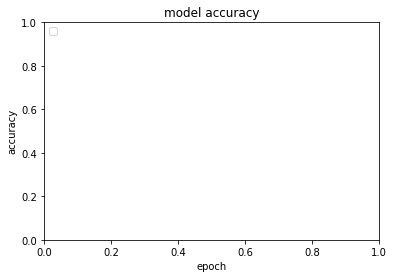

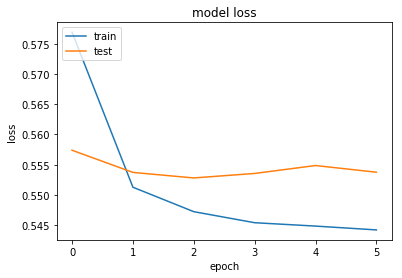

In [72]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## 2nd model : convolutional neural network

In [10]:
#model 2 : convolutional neural network
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          8501000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 8,565,257
Trainable params: 64,257
Non-trainable params: 8,501,000
_________________________________________________________________
None


In [11]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Train on 128000 samples, validate on 32001 samples
Epoch 1/6
128000/128000 [==============================] - 75s 588us/step - loss: 0.5085 - acc: 0.7372 - val_loss: 0.4741 - val_acc: 0.7638
Epoch 2/6
128000/128000 [==============================] - 80s 622us/step - loss: 0.4450 - acc: 0.7820 - val_loss: 0.4559 - val_acc: 0.7780
Epoch 3/6
128000/128000 [==============================] - 84s 658us/step - loss: 0.4121 - acc: 0.8043 - val_loss: 0.4550 - val_acc: 0.7784
Epoch 4/6
128000/128000 [==============================] - 80s 628us/step - loss: 0.3849 - acc: 0.8195 - val_loss: 0.4639 - val_acc: 0.7760
Epoch 5/6
128000/128000 [==============================] - 84s 658us/step - loss: 0.3601 - acc: 0.8355 - val_loss: 0.4744 - val_acc: 0.7736
Epoch 6/6
40001/40001 [==============================] - 9s 233us/step
Test Score: 0.4925604996541206
Test Accuracy: 0.7695807814598083


## 3rd model : recurrent neural network

In [68]:
#3rd model : recurrent neural net
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          8501000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 8,618,377
Trainable params: 117,377
Non-trainable params: 8,501,000
_________________________________________________________________
None


In [69]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Train on 128000 samples, validate on 32001 samples
Epoch 1/6
128000/128000 [==============================] - 305s 2ms/step - loss: 0.6932 - acc: 0.4979 - val_loss: 0.6931 - val_acc: 0.5012
Epoch 2/6
128000/128000 [==============================] - 305s 2ms/step - loss: 0.6932 - acc: 0.5001 - val_loss: 0.6932 - val_acc: 0.4988
Epoch 3/6
128000/128000 [==============================] - 316s 2ms/step - loss: 0.6932 - acc: 0.4984 - val_loss: 0.6931 - val_acc: 0.5012
Epoch 4/6
128000/128000 [==============================] - 293s 2ms/step - loss: 0.6932 - acc: 0.4987 - val_loss: 0.6932 - val_acc: 0.4988
Epoch 5/6
128000/128000 [==============================] - 285s 2ms/step - loss: 0.6932 - acc: 0.4979 - val_loss: 0.6932 - val_acc: 0.4988
Epoch 6/6
40001/40001 [==============================] - 41s 1ms/step
Test Score: 0.6931495779109166
Test Accuracy: 0.5003374814987183


## Computing predictions

It computes the predictions (on the preprocessed dataset with lemmatization from the preprocessing notebook) of the last model that was ran from the 3 models above.

In [54]:
to_predict_lem = pd.read_csv("to_predict_lem.csv")
to_predict_lem.drop(to_predict_lem.columns[0], axis=1,inplace=True) #drop a weird index column
to_predict_lem.index += 1

to_predict_lem = to_predict_lem['tweet']
to_predict_lem = to_predict_lem.astype(str)


In [55]:
to_predict_lem= tokenizer.texts_to_sequences(to_predict_lem)

to_predict_lem = pad_sequences(to_predict_lem, padding='post', maxlen=maxlen)
to_predict_lem

array([[1225, 4521,  639, ...,    0,    0,    0],
       [  20,   40,  109, ...,    0,    0,    0],
       [  23,  200,  219, ...,    0,    0,    0],
       ...,
       [ 232, 1329,  195, ...,    0,    0,    0],
       [ 137,  238,    0, ...,    0,    0,    0],
       [  19,  251,  586, ...,    0,    0,    0]])

In [56]:
result = model.predict(to_predict_lem)

In [58]:
#it returns values between [0,1] (since sigmoid is used) 
result[result < 0.5] = -1 #replace values < 0.5 to -1
result[result >= 0.5] = 1

In [59]:
result

array([[-1.],
       [-1.],
       [ 1.],
       ...,
       [-1.],
       [ 1.],
       [-1.]], dtype=float32)

In [62]:

#create_csv_submission([x for x in range(1,len(result)+1)],result,"2ndmodel.csv")